In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

## Preprocessing

In [184]:
df=pd.read_csv('troop_movements.csv')
df['is_resistance']=df['empire_or_resistance'].str.contains('resistance')

In [185]:
# # Split the data using train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Print the shapes of train and test sets
# print("train_test_split:")
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

In [186]:
# Define the features and target variable
X = df[['homeworld','unit_type']]
y = df['is_resistance']  # Target variable

In [187]:
X_dummy=pd.get_dummies(X)

In [188]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("train_test_split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

train_test_split:
X_train shape: (800, 50)
X_test shape: (200, 50)
y_train shape: (800,)
y_test shape: (200,)


In [189]:
# # Initialize ShuffleSplit
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# # Split the data
# for train_index, test_index in shuffle_split.split(X_dummy):
#     X_train, X_test = X_dummy.iloc[train_index], X_dummy.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# # Print the shapes of train and test sets
# print("ShuffleSplit:")
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

## Decision Tree Classifier

In [190]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

In [191]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.48


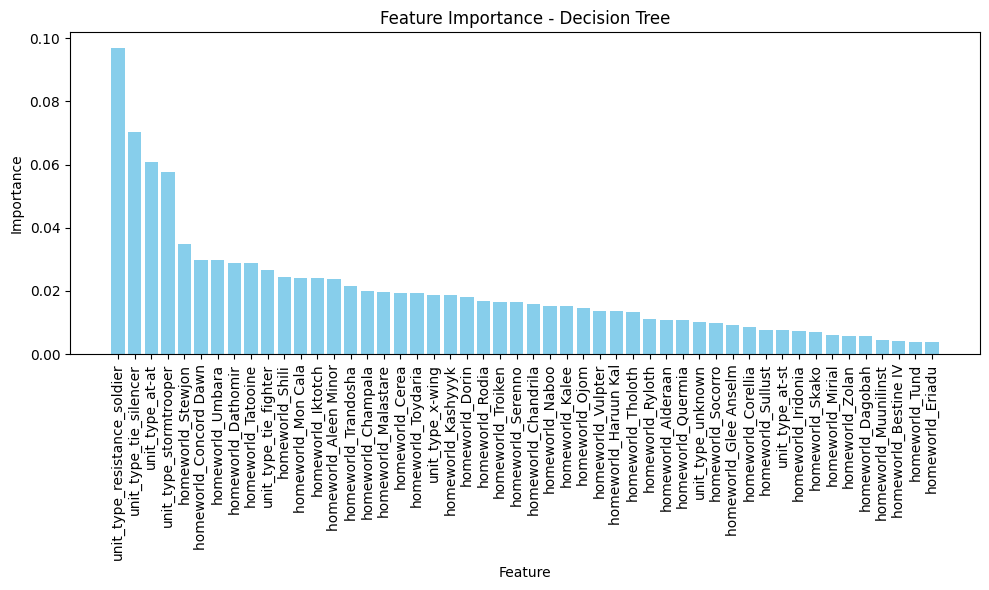

In [194]:
# Get feature importance
importance=dtc.feature_importances_

#Create df to hold feature importance
feature_importances=pd.DataFrame({'Feature': X_dummy.columns, 'Importance': importance})
feature_importances=feature_importances.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(10,6))
plt.bar(feature_importances['Feature'],feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()